### Author:REVATHY REMESH

### GRIPJULY21-The Spark Foundation-Data Science & Business Analytics Internship

### Task6:Prediction using Decision Tree Alorithum

#### Problem Statement: 

Create the Decision Tree classifier and visualize it graphically.

### Importing Required Libraries

Let's first load the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# Decision Tree Classifier Building in Scikit-learn
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Loading Data

Let's  load the required 'Iris.csv' dataset using pandas' read CSV function. 

In [2]:
# read the dataset
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Inspecting DataFrame

In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Perform EDA



In [7]:
df.rename(columns={'SepalLengthCm': 'SepalLength(Cm)','SepalWidthCm':'SepalWidth(Cm)','PetalLengthCm':'PetalLength(Cm)','PetalWidthCm':'PetalWidth(Cm)'}, inplace=True)


In [8]:
df.head()

,Id,SepalLength(Cm),SepalWidth(Cm),PetalLength(Cm),PetalWidth(Cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#unique values
df.drop(labels=None, axis=1, index=None, columns='Id', level=None, inplace=True, errors='raise')

This data frame has no outliers and missing values ,their is no abnormalities in the data.

### Feature Selection

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [10]:
#split dataset in features and target variable
feature_cols = ['SepalLength(Cm)', 'SepalWidth(Cm)', 'PetalLength(Cm)', 'PetalWidth(Cm)']
X = df[feature_cols] # Features
y = df.Species # Target variable

### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split().

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Building Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model

Let's estimate, how accurately the classifier or model can predict the test values.

Accuracy can be computed by comparing actual test set values and predicted values.

In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


Well, we got a classification rate of 95.55%, considered as very good accuracy

### Visualizing Decision Trees

 export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

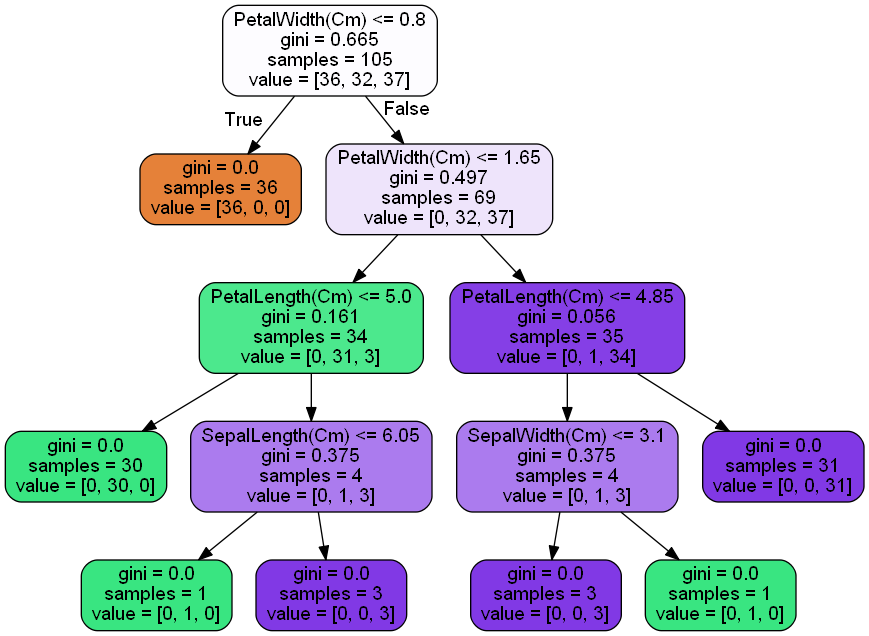

In [14]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(clf , out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. we can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.
This model is less complex,explaneable and easy to understand.we feed any new data to this classifier, it would predict the right class.